<a href="https://colab.research.google.com/github/AKHILM20DS007/AKHILM20DS007/blob/main/Linear_Regression_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/Salary_Data (1).csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = np.array(data[['YearsExperience']])  ## feature

In [ ]:
x.shape

(30, 1)

In [ ]:
y = np.array(data['Salary'])   ## target

In [ ]:
y.shape

(30,)

In [ ]:
data.isnull().sum() # checking null values

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
### Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=9014)

In [ ]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [ ]:
### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### Train the model
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
### Prediction / Testing
ypred = model.predict(xtest)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [ ]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [ ]:
ytest

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [ ]:
### R-Square (R2 Score)
from sklearn.metrics import r2_score
score = r2_score(ytest,ypred)
score*100

99.842716176972

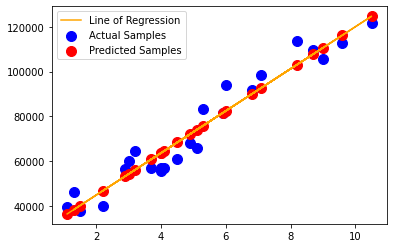

In [ ]:
### Line of Regression (Training Samples)
plt.scatter(xtrain,ytrain,color="blue",label="Actual Samples",s=100)
plt.scatter(xtrain,model.predict(xtrain),color="red",label="Predicted Samples",s=100)
plt.plot(xtrain,model.predict(xtrain),color="orange",label="Line of Regression")
plt.legend()
plt.show()

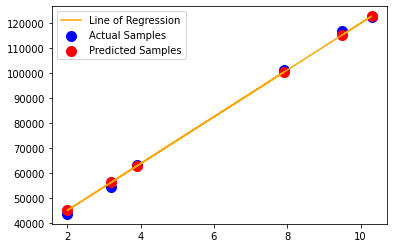

In [ ]:
### Line of Regression (Testing Samples)
plt.scatter(xtest,ytest,color="blue",label="Actual Samples",s=100)
plt.scatter(xtest,model.predict(xtest),color="red",label="Predicted Samples",s=100)
plt.plot(xtest,model.predict(xtest),color="orange",label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
### Increase Accuracy
### Cross Validation

In [ ]:
accuracy = []
for i in range(10000):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain1,ytrain1)
  ypred1 = model1.predict(xtest1)
  score1 = r2_score(ytest1,ypred1)
  accuracy.append(score1)

In [ ]:
np.max(accuracy)

0.99842716176972

In [ ]:
np.argmax(accuracy)

9014

In [ ]:
### Creating Web Application

In [ ]:
### Save the model
import joblib
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [ ]:
mymodel = joblib.load("/content/salary.pkl")

In [ ]:
mymodel.predict([[10]])

array([120004.37920511])

In [ ]:
round(mymodel.predict([[10]])[0],2)

120004.38

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 9.1 MB 5.2 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 180 kB 39.8 MB/s 
     |████████████████████████████████| 178 kB 57.4 MB/s 
     |████████████████████████████████| 4.3 MB 35.0 MB/s 
     |████████████████████████████████| 111 kB 75.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 125 kB 37.6 MB/s 
     |████████████████████████████████| 791 kB 43.6 MB/s 
     |████████████████████████████████| 374 kB 61.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.23 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.5.1 which is incompatible.
google-colab 1.0.0 requires ipytho

In [ ]:
!pip install pyngrok==4.1.1 --quiet

In [ ]:
from pyngrok import ngrok

In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
public_url = ngrok.connect(port = "8501")
print(public_url)

http://f73b-35-194-72-206.ngrok.io
